# Project 1 - Non-Preemptive CPU Schuedling Analysis
### CS337 Operating Systems Prof. Al Madi - Spring 2022
###### Matthew Bass : 02/14/2022
---
## Overview:
    This is a Jupyter Notebook to analysize the 3 different process
    schuedling algorithims (First Come FirstServe, Shortest Job First and
    Priority Schuedling) through differnt schuedling simulation. The results
    will be analyized with plots and genral statistics.

---

## Setup:

In [96]:
# Importing necessary libraries
import pandas as pd
import operating_system
import scheduler
from process import Process

---
## First Come First Serve (FCFS):

    The First Come First Serve algorithim schuedules jobs to be executed
    based on the time that the arrive to the ready queue (jobs that arrive
    earlier are proccessed earlier). The FCFS algorithim can be thought of as
    just implementing a first in first out (FIFO) queue. The algorithim can
    be unfair to processes with short bust time but it will alsoe never
    encounter starvation which is where a process ready to run for CPU can wait
    indefinitely because of low priority. It can also have varying or
    extremly long response times and can encounter the Convoy Effect which is
    where, one long-burst process is followed by many short-burst processes,
    short processes have to wait a long time (This is what causes it to be
    unfair to processes with short burt times)
    
    
   #### Testing:

In [97]:
# Run the kernel with FCFS and base test processes
operating_system.kernal(scheduler.FCFS_scheduler,file_proc_name="test")

Warning no processes were passed!! Making test Processes
Process ID: 1 , Start Time: 0 , End Time: 5
Process ID: 2 , Start Time: 5 , End Time: 9
Process ID: 3 , Start Time: 9 , End Time: 10
Process ID: 4 , Start Time: 10 , End Time: 16


In [98]:
# Importing the results from FCFS test
fcfs_results = pd.read_csv("data/Combined_Data/"+
                               "All_FCFS_test_results.csv")



In [99]:
# Ploting the Results
operating_system.plotCPU(fcfs_results,"FCFS Test Results Timeline")


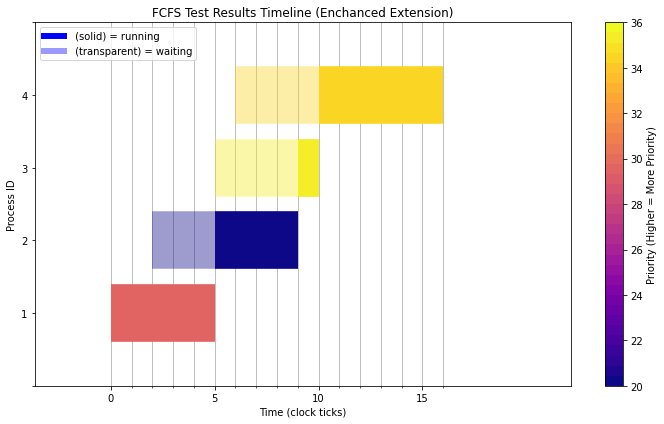

In [100]:
# Plotting both results enchanced
operating_system.plotKernalResults(fcfs_results,
                       title="FCFS Test Results Timeline (Enchanced Extension)" )

<br>

#### Fairness:
    As mentioned earlier FCFS can be unfair to processex with short burst
    times when the Convoy Effect happens. This is where, one long-burst
    process is followed by many short-burst processes, short processes have
    to wait a long time.

    This will be demonstrated below:

In [101]:
#making the unfair FCFS processes
unfair_fcfs_procs = [Process(1,1,1,13),Process(2,25,1,71),
                     Process(3,1,1,82),Process(4,2,2,5),
                     Process(5,1,2,122),Process(6,3,5,100),
                     Process(7,1,4,53),Process(8,1,8,63),
                     Process(9,1,11,35),Process(10,1,9,73)]



# Run the kernel with FCFS and unfair processes
operating_system.kernal(scheduler.FCFS_scheduler,processes=unfair_fcfs_procs,
                        file_proc_name="unfair")


# Importing the CPU results from FCFS unfair
fcfs_unfair_results = pd.read_csv("data/Combined_Data/"+
                               "All_FCFS_unfair_results.csv")



Process ID: 3 , Start Time: 1 , End Time: 2
Process ID: 2 , Start Time: 2 , End Time: 27
Process ID: 1 , Start Time: 27 , End Time: 28
Process ID: 5 , Start Time: 28 , End Time: 29
Process ID: 4 , Start Time: 29 , End Time: 31
Process ID: 7 , Start Time: 31 , End Time: 32
Process ID: 6 , Start Time: 32 , End Time: 35
Process ID: 8 , Start Time: 35 , End Time: 36
Process ID: 10 , Start Time: 36 , End Time: 37
Process ID: 9 , Start Time: 37 , End Time: 38


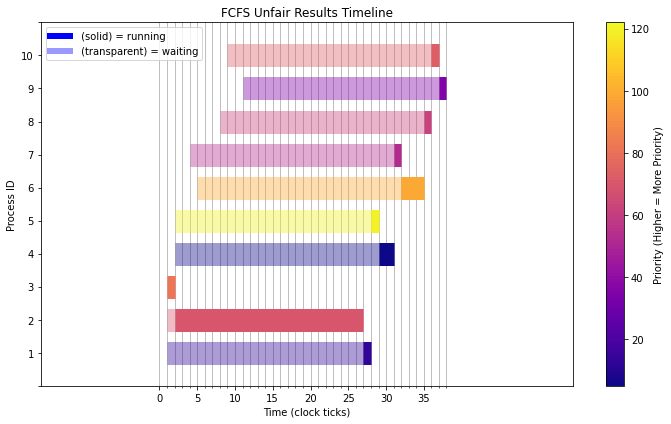

In [102]:
#plotting the results
operating_system.plotKernalResults(fcfs_unfair_results,
                       title="FCFS Unfair Results Timeline" )

As we can see because processes 1, 2 and 3 all arrive at the same time the
scheduling algorithm chooses one of the 3 processes that have arrived at
"random" (not truly random in this case because of how my exact code is written
 it will run the processes in the reverse order they were in the processes list if they
arrive at the same time). So we can see one of the short burt time processes
 is run (process 3), however after process 3 runs, process 2 runs which has
 an extremely long burst time in comparison to all the other processes. This
 cause all the short burt time processes that arrived during and after when
 process 2 starts running are penalized with very long wait times while they
 wait for process 2 to finish its work.

<br>

---
## Shortest Job First (SJF):

    The Shortest Job First algorithm schedules jobs to be executed
    based on the burst time (working time) of the processes in the ready
    queue. The SJF algorithm is one of the best approaches to minimize wait
    times and easy to implement when the CPU knows how long the process will
    take (in fact it needs to know this). This algorithim can be unfair to
    processes with long burt times though, because a long job might have to
    keep waiting for a multitude of shorter jobs to complete It can also face
     starvation with very long processes. The overhead can also be hugh
     because it requires recording and or estimating cpu burst times.
    
    
   #### Testing:

In [103]:
# Run the kernel with SJF and base test processes
operating_system.kernal(scheduler.SJF_scheduler,file_proc_name="test")

Warning no processes were passed!! Making test Processes
Process ID: 1 , Start Time: 0 , End Time: 5
Process ID: 3 , Start Time: 5 , End Time: 6
Process ID: 2 , Start Time: 6 , End Time: 10
Process ID: 4 , Start Time: 10 , End Time: 16


In [104]:
# Importing the results 
sjf_results_test = pd.read_csv("data/Combined_Data/" +
                               "All_SJF_test_results.csv")


In [105]:
# Ploting the test Results
operating_system.plotCPU(sjf_results_test,"SJF Test Results Timeline")

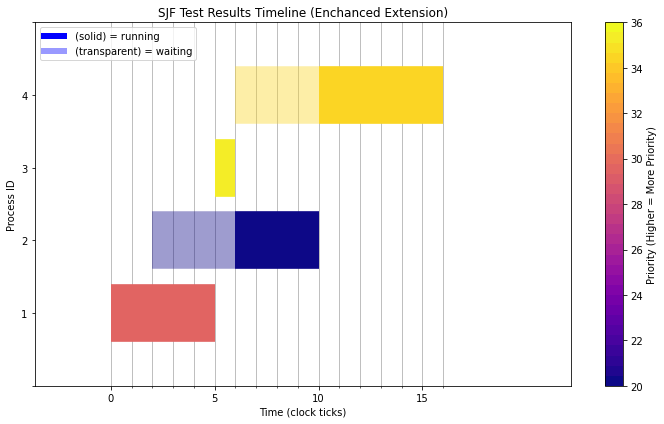

In [106]:
# Plotting the enhanced test results
operating_system.plotKernalResults(sjf_results_test,
                       title="SJF Test Results Timeline (Enchanced Extension)" )

#### Fairness:
    As mentioned earlier SJF is unfair to processes with longer burst times as
     a processes with a long burst time can end up waiting a very long time
     to run as processes with shorter burt times arrive in the ready queue
     and this can lead to starvation.

    Below this will be demonstrated:

In [107]:
#making the unfair SJF processes
unfair_sjf_procs = [Process(1,1,1,13),Process(2,2,1,122),
                     Process(3,25,1,82),Process(4,3,2,5),
                     Process(5,2,10,71),Process(6,3,5,100),
                     Process(7,3,4,53),Process(8,6,8,63),
                     Process(9,2,11,82),Process(10,2,9,73)]

# Run the kernel with SJF and unfair processes
operating_system.kernal(scheduler.SJF_scheduler,processes=unfair_sjf_procs,
                        file_proc_name="unfair")


# Importing the results from SJF unfair
sjf_unfair_results = pd.read_csv("data/Combined_Data/"+
                               "All_SJF_unfair_results.csv")

Process ID: 1 , Start Time: 1 , End Time: 2
Process ID: 2 , Start Time: 2 , End Time: 4
Process ID: 7 , Start Time: 4 , End Time: 7
Process ID: 6 , Start Time: 7 , End Time: 10
Process ID: 5 , Start Time: 10 , End Time: 12
Process ID: 9 , Start Time: 12 , End Time: 14
Process ID: 10 , Start Time: 14 , End Time: 16
Process ID: 4 , Start Time: 16 , End Time: 19
Process ID: 8 , Start Time: 19 , End Time: 25
Process ID: 3 , Start Time: 25 , End Time: 50


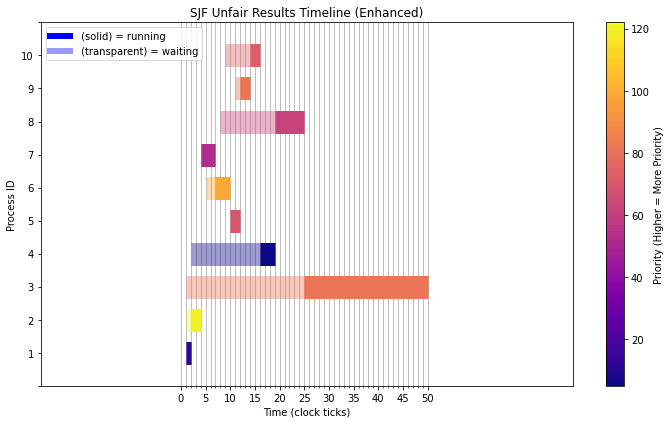

In [108]:
#plotting the results
operating_system.plotKernalResults(sjf_unfair_results,
                       title="SJF Unfair Results Timeline (Enhanced)" )

Here we can see that even though process 3 arrives before many of the otther
processes because of how long its burst time is it is penalized heavily with
a long wait time while processes with shorter burt times keep arriving to the
ready queue forcing processes 3 to wait until it is the last processes yet to
be run before it can run. This clearly demonstrates how processes with long
burst times are unfairly penalized with SJF.


<br>

---
## Priority Scheduling:

    The Priority algorithm schedules jobs to be executed
    based on their externally defined priority level. The Priority algorithm
    can still face problems like being unfair with it being unfair to
    processes with low priority (when it is a correlation priorty like for
    this algorithim). This algorithim can also face starvation. One advantage
     of Priority schuedling is that it can have very low over head (alot of
     times just needing to be a max heap).
    
    
   #### Testing:

In [109]:
# Run the kernel with Priority Schuedling and base test processes
operating_system.kernal(scheduler.Priority_scheduler,file_proc_name="test")

Warning no processes were passed!! Making test Processes
Process ID: 1 , Start Time: 0 , End Time: 5
Process ID: 3 , Start Time: 5 , End Time: 6
Process ID: 4 , Start Time: 6 , End Time: 12
Process ID: 2 , Start Time: 12 , End Time: 16


In [110]:
# Importing the results 
priority_results = pd.read_csv("data/Combined_Data/"+
                               "All_Priority_test_results.csv")

In [111]:
# Ploting the test Results
operating_system.plotCPU(priority_results,'Priority Test Results Timeline')

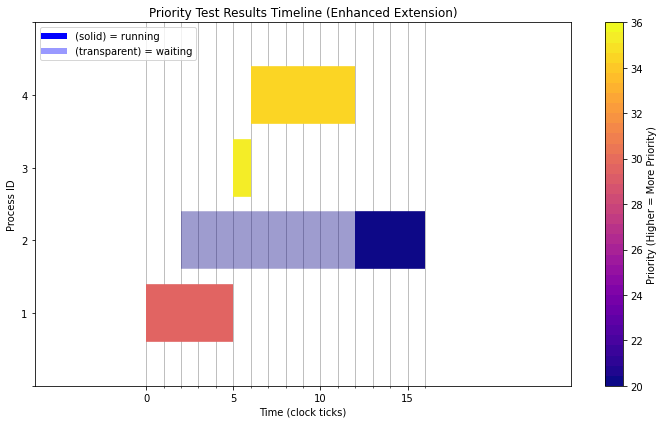

In [112]:
# Plotting the enhanced test results
operating_system.plotKernalResults(priority_results,
                       title="Priority Test Results Timeline (Enhanced Extension)" )


#### Fairness:
    As mentioned earlier priority schuedling can be very unfair to processes
    with low priority (Esppecially in this case where the priorities for each
    process are assighned externaly). This can lead to processes with low
    priority levels having very long wait times and even at times starvation
    could occur.

    This will be demonstrated below:

In [113]:
#making the unfair SJF processes
unfair_priority_procs = [Process(1,5,1,300),Process(2,2,1,24),
                     Process(3,10,18,290),Process(4,3,2,423),
                     Process(5,2,10,331),Process(6,3,9,192),
                     Process(7,3,19,389),Process(8,6,28,230),
                     Process(9,2,11,290),Process(10,2,9,360)]

# Run the kernel with SJF and unfair processes
operating_system.kernal(scheduler.Priority_scheduler,
                        processes=unfair_priority_procs,
                        file_proc_name="unfair")


# Importing the results from SJF unfair
priority_unfair_results = pd.read_csv("data/Combined_Data/"+
                               "All_Priority_unfair_results.csv")

Process ID: 1 , Start Time: 1 , End Time: 6
Process ID: 4 , Start Time: 6 , End Time: 9
Process ID: 10 , Start Time: 9 , End Time: 11
Process ID: 5 , Start Time: 11 , End Time: 13
Process ID: 9 , Start Time: 13 , End Time: 15
Process ID: 6 , Start Time: 15 , End Time: 18
Process ID: 3 , Start Time: 18 , End Time: 28
Process ID: 7 , Start Time: 28 , End Time: 31
Process ID: 8 , Start Time: 31 , End Time: 37
Process ID: 2 , Start Time: 37 , End Time: 39


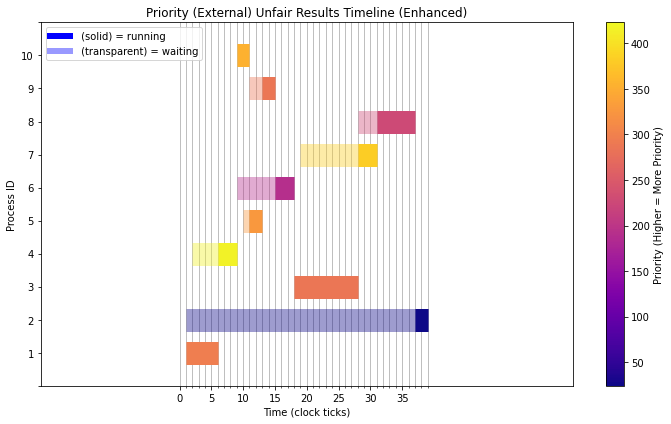

In [114]:
#plotting the results
operating_system.plotKernalResults(priority_unfair_results,
                       title="Priority (External) Unfair Results Timeline "
                             "(Enhanced)" )


As we can see Process 2 even though it is one of the first processes to
arrive and it has a very short burt time it still faces a very long wait time
 and is the last of the ten processes to run because of how low its priority
 is here thus resulting is a very unfair wait time and possible starvation if
 the CPU did not have enough time to get to all the processes.

<br>


---
## Priority Aging:

    This schuedling algorithim is just like the base Priority schuedling
    algorithim where it schuedles process in the ready queue based on their
    externaly defined priority (higher the priority the sooner the process is
    ran). This scheduling algorithim tries to be a bit fairer to processes
    with low priority (and tries to prevent starvation by increasing the
    priority of processes in the ready queue by a 10th of the max priority
    value of all processes so at most a processes will have to wait 10 time
    steps before it has max priority) This should hopefully make the
    schuedling algortithim a bit more fair. This algorithim can be thought of
     as a mix between FCFS and SJF (longest) because it two different processes
     have the same arrival time the longer burst time process will run first but
     then as the process waits in the ready queue it ages by affing its wait
     time to the priority level along with its burst time


   #### Testing:

In [115]:
# Run the kernel with Priority_Aging and base test processes
operating_system.kernal(scheduler.Priority_Aging_scheduler,
                        file_proc_name="test")

Warning no processes were passed!! Making test Processes
Process ID: 1 , Start Time: 0 , End Time: 5
Process ID: 3 , Start Time: 5 , End Time: 6
Process ID: 4 , Start Time: 6 , End Time: 12
Process ID: 2 , Start Time: 12 , End Time: 16


In [116]:
# Importing the results from FCFS test
priority_aging_results = pd.read_csv("data/Combined_Data/"+
                               "All_Priority_Aging_test_results.csv")



In [117]:
# Ploting the Results
operating_system.plotCPU(priority_aging_results,"Priority Aging Test Results Timeline")


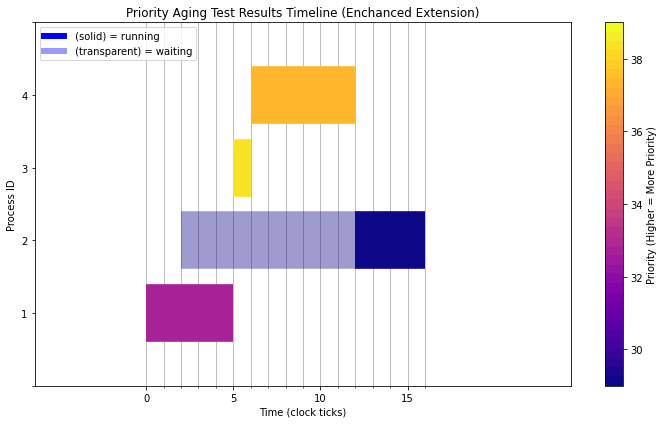

In [118]:
# Plotting both results enchanced
operating_system.plotKernalResults(priority_aging_results,
                       title="Priority Aging Test Results Timeline (Enchanced"
                             " Extension)" )


#### Fairness:
    As mentioned earlier priority schuedling can be very unfair to processes
    with low priority (Esppecially in this case where the priorities for each
    process are assighned externaly). This can lead to processes with low
    priority levels having very long wait times and even at times starvation
    could occur.

    This will be demonstrated below:

In [119]:
#making the unfair SJF processes
unfair_priority_aging_procs = [Process(1,5,1,300),Process(2,2,1,24),
                     Process(3,10,18,290),Process(4,3,2,423),
                     Process(5,2,10,331),Process(6,3,9,192),
                     Process(7,3,19,389),Process(8,6,28,230),
                     Process(9,2,11,290),Process(10,2,9,360)]

# Run the kernel with SJF and unfair processes
operating_system.kernal(scheduler.Priority_Aging_scheduler,
                        processes=unfair_priority_aging_procs,

                        file_proc_name="unfair")


# Importing the results from SJF unfair
priority_aging_unfair_results = pd.read_csv("data/Combined_Data/"+
                               "All_Priority_Aging_unfair_results.csv")

Process ID: 1 , Start Time: 1 , End Time: 6
Process ID: 4 , Start Time: 6 , End Time: 9
Process ID: 10 , Start Time: 9 , End Time: 11
Process ID: 5 , Start Time: 11 , End Time: 13
Process ID: 9 , Start Time: 13 , End Time: 15
Process ID: 6 , Start Time: 15 , End Time: 18
Process ID: 2 , Start Time: 18 , End Time: 20
Process ID: 7 , Start Time: 20 , End Time: 23
Process ID: 3 , Start Time: 23 , End Time: 33
Process ID: 8 , Start Time: 33 , End Time: 39


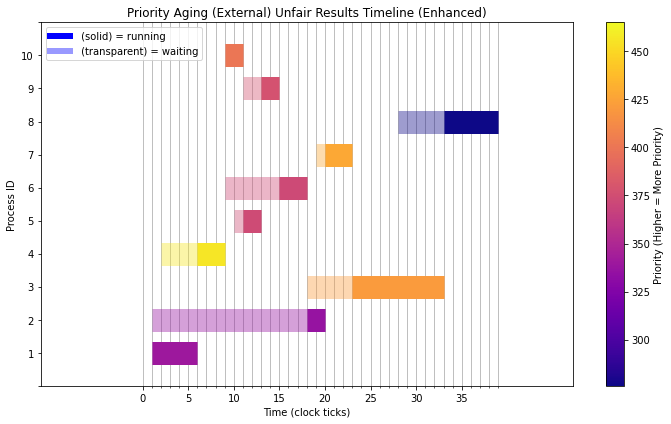

In [120]:
#plotting the results
operating_system.plotKernalResults(priority_aging_unfair_results,
                       title="Priority Aging (External) Unfair Results "
                             "Timeline "
                             "(Enhanced)" )



Here we can see that with the exact same processes as priority schuedling
with no aging, this priority aging scheduling algorithm is a bit more fair
with the second process slowly aging until it has a priority that has been
aged to a great enough level so that it does not have to wait for all the
other processes to run before it runs.


<br>


---
## Priority Turnaround (Internally Defined) (EXTENSION):

    The Priority Turnaround algorithm schedules processes to be executed
    based on the priority level of each processes which is bases on burst time
    (working time) of the processes in the ready queue along with the
    processe' wait time, so it is slowly aging the priority as well. The
    Priority Turnaround algorithm can
    still face problems like being unfair with it being unfair to processes
    with low priority (when it is a correlation priority like for this
    algorithm). This algorithm can also face starvation but shouldnt be as
    bad because it is aging by increasing priority the longer the processes
    waits in the ready queue.

    The code for the priority of each process is as follows:

```python
for proc in ready:
    proc.priority = (time - proc.arrival_time) + max_burst_time - proc.burst_time
```
   #### Testing:

In [121]:
# Run the kernel with Priority_Aging and base test processes
operating_system.kernal(scheduler.Priority_Turnaround_scheduler,
                        file_proc_name="test")

Warning no processes were passed!! Making test Processes
Process ID: 1 , Start Time: 0 , End Time: 5
Process ID: 3 , Start Time: 5 , End Time: 6
Process ID: 2 , Start Time: 6 , End Time: 10
Process ID: 4 , Start Time: 10 , End Time: 16


In [122]:
# Importing the results from FCFS test
priority_tr_results = pd.read_csv("data/Combined_Data/"+
                               "All_Priority_Turnaround_test_results.csv")



In [123]:
# Ploting the Results
operating_system.plotCPU(priority_tr_results,"Priority Turnaround Test "
                                                "Results Timeline")


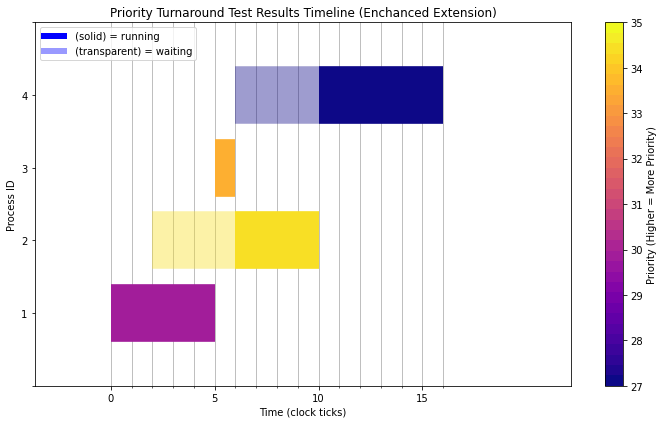

In [124]:
# Plotting both results enchanced
operating_system.plotKernalResults(priority_tr_results,
                       title="Priority Turnaround Test Results Timeline "
                             "(Enchanced"
                             " Extension)" )

#### Fairness:
    The Priority Turnaround algorithm can still face problems like being
    unfair with it being unfair to processes with low priority (when it is a
    correlation priority like for this algorithm). This algorithm can also
    face starvation but shouldnt be as bad because it is aging by increasing
    priority the longer the processes waits in the ready queue. This
    algorithim can be thought of as a mix of FCFS and SJF while also applying
    aging.

    Below will demonstrate this algorithim with the same processes as all the
     other priority schuedling algorithims:


In [125]:
#making the unfair SJF processes
unfair_priority_tr_procs = [Process(1,5,1,300),Process(2,2,1,24),
                     Process(3,10,18,290),Process(4,3,2,423),
                     Process(5,2,10,331),Process(6,3,9,192),
                     Process(7,3,19,389),Process(8,6,28,230),
                     Process(9,2,11,290),Process(10,2,9,360)]

# Run the kernel with SJF and unfair processes
operating_system.kernal(scheduler.Priority_Turnaround_scheduler,
                        processes=unfair_priority_tr_procs,

                        file_proc_name="unfair")


# Importing the results from SJF unfair
priority_tr_unfair_results = pd.read_csv("data/Combined_Data/"+
                               "All_Priority_Turnaround_unfair_results.csv")

Process ID: 2 , Start Time: 1 , End Time: 3
Process ID: 4 , Start Time: 3 , End Time: 6
Process ID: 1 , Start Time: 6 , End Time: 11
Process ID: 10 , Start Time: 11 , End Time: 13
Process ID: 5 , Start Time: 13 , End Time: 15
Process ID: 6 , Start Time: 15 , End Time: 18
Process ID: 9 , Start Time: 18 , End Time: 20
Process ID: 7 , Start Time: 20 , End Time: 23
Process ID: 3 , Start Time: 23 , End Time: 33
Process ID: 8 , Start Time: 33 , End Time: 39


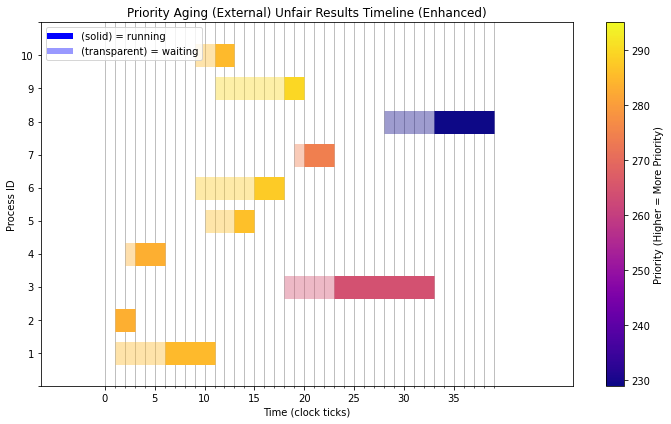

In [126]:
#plotting the results
operating_system.plotKernalResults(priority_tr_unfair_results,
                       title="Priority Aging (External) Unfair Results "
                             "Timeline "
                             "(Enhanced)" )

From this visualization it appears that this is the most fair algorithim I
have come up with so far. To confirm this in later projects I will run
thousands of processes through the different simulations to compare average
fairness over many samples

<br>
---

## References and Acnowlagements

On this project I received help and knowledge from :
   - Prof. Al Madi
   - [Matplotlib event plot documentation](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.eventplot.html)
   - [General Matplotlib Docs](https://matplotlib.org/)
   - [Project Details](https://github.com/mattjax16/CS337-Operating-Systems/blob/master/Projects/Proj1/Project%201_%20Non-preemptive%20CPU%20Scheduling.pdf)

